In [31]:
import keras
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers
import tensorflow as tf
from keras.utils.vis_utils import plot_model
import os, shutil
import matplotlib.pyplot as plt

In [2]:
print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


In [32]:
conv_base = VGG19(weights='imagenet',include_top=False,input_shape=(150, 150, 3))
conv_base.summary()

80150528/80134624 [==============================] - 7s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

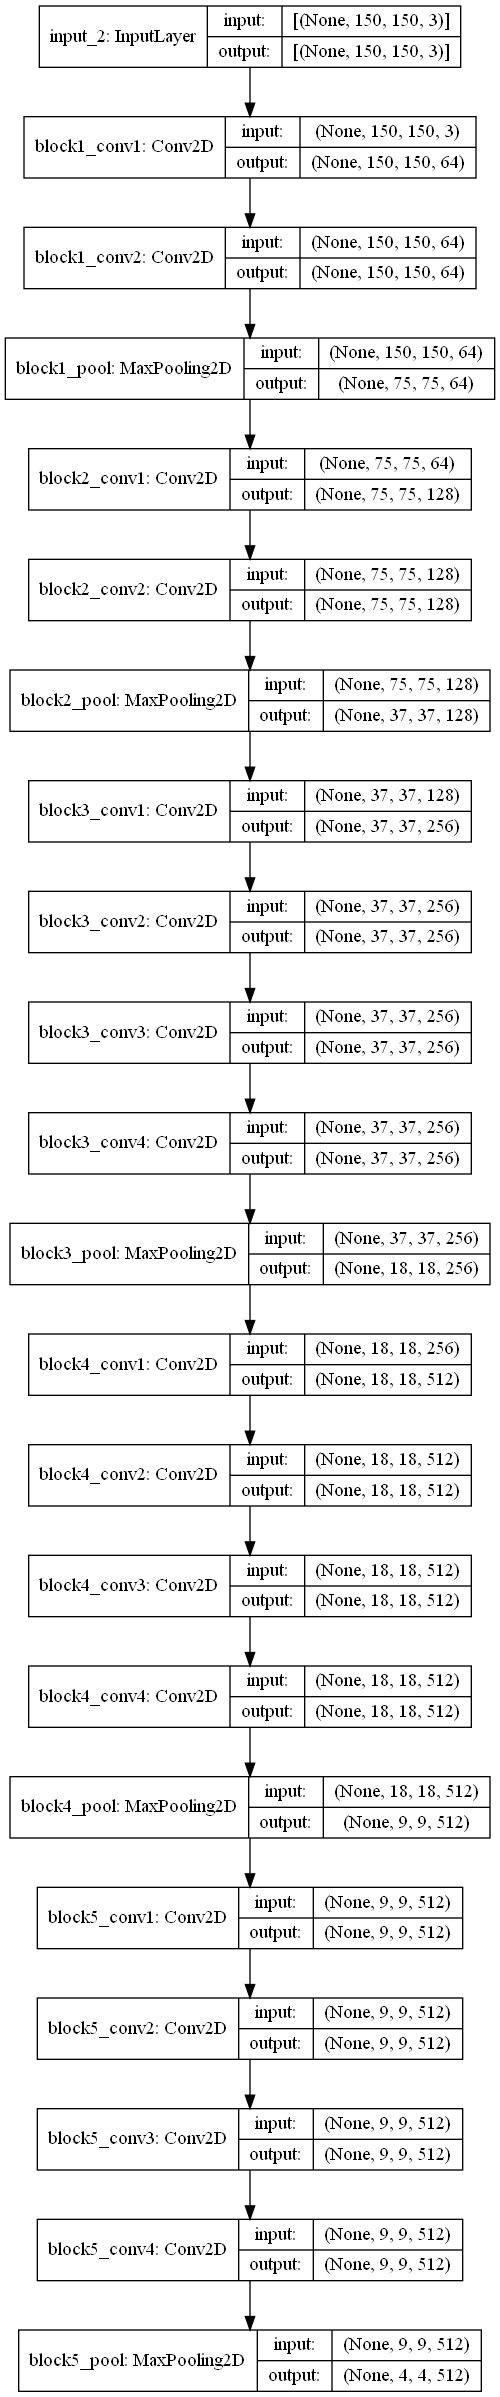

In [33]:
plot_model(conv_base, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [3]:
original_dataset_dir = 'original_images'
original_dataset_dir_board = 'original_images/board'
original_dataset_dir_noboard = 'original_images/noboard'

In [4]:
# The directory where we will store our train, test and validation images
base_dir = 'boardnoboardimages'


# Directories for our training,validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training rust pictures
train_board_dir = os.path.join(train_dir, 'board')

# Directory with our training norust pictures
train_noboard_dir = os.path.join(train_dir, 'noboard')

# Directory with our validation rust pictures
validation_board_dir = os.path.join(validation_dir, 'board')

# Directory with our validation norust pictures
validation_noboard_dir = os.path.join(validation_dir, 'noboard')

# Directory with our test rust pictures
test_board_dir = os.path.join(test_dir, 'board')

# Directory with our test norust pictures
test_noboard_dir = os.path.join(test_dir, 'noboard')

In [7]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)
os.mkdir(train_board_dir)
os.mkdir(train_noboard_dir)
os.mkdir(validation_board_dir)
os.mkdir(validation_noboard_dir)
os.mkdir(test_board_dir)
os.mkdir(test_noboard_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'boardnoboardimages'

In [5]:
# Copy first 15 rust images to train_rust_dir
fnames = ['M{}.jpg'.format(i) for i in range(1,15)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_board, fname)
    dst = os.path.join(train_board_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 5 rust images to validation_rust_dir
fnames = ['M{}.jpg'.format(i) for i in range(15, 20)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_board, fname)
    dst = os.path.join(validation_board_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 5 rust images to test_rust_dir
fnames = ['M{}.jpg'.format(i) for i in range(20, 25)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_board, fname)
    dst = os.path.join(test_board_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 15 non-rust images to train_norust_dir
fnames = ['nb{}.jpg'.format(i) for i in range(1,15)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_noboard, fname)
    dst = os.path.join(train_noboard_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 5 norust images to validation_norust_dir
fnames = ['nb{}.jpg'.format(i) for i in range(15, 20)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_noboard, fname)
    dst = os.path.join(validation_noboard_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 5 norust images to test_norust_dir
fnames = ['nb{}.jpg'.format(i) for i in range(20, 25)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_noboard, fname)
    dst = os.path.join(test_noboard_dir, fname)
    shutil.copyfile(src, dst)

In [6]:

print('total training board images:', len(os.listdir(train_board_dir)))
print('total training noboard images:', len(os.listdir(train_noboard_dir)))
print('total validation board images:', len(os.listdir(validation_board_dir)))
print('total validation noboard images:', len(os.listdir(validation_noboard_dir)))
print('total test board images:', len(os.listdir(test_board_dir)))
print('total test noboard images:', len(os.listdir(test_noboard_dir)))

total training rust images: 14
total training norust images: 14
total validation rust images: 5
total validation norust images: 5
total test rust images: 5
total test norust images: 5


In [34]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [9]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [36]:
conv_base.trainable = False

In [11]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [37]:
base_dir = 'boardnoboardimages'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

 #       save_to_dir='/home/anirban/rustnorust_b/images')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 28 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [56]:
from time import time
from keras.callbacks import TensorBoard
#callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.00001,patience=5,mode='min')]
tensorboard = keras.callbacks.TensorBoard(log_dir='/output/{}'.format(time()))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

history = model.fit_generator(train_generator,epochs=15,validation_data=train_generator,validation_steps=20,verbose=2,callbacks=[tensorboard])

Epoch 1/15
7/7 - 12s - loss: 0.1680 - acc: 0.9643 - val_loss: 0.1215 - val_acc: 1.0000
Epoch 2/15
7/7 - 3s - loss: 0.1255 - acc: 1.0000
Epoch 3/15
7/7 - 3s - loss: 0.1331 - acc: 1.0000
Epoch 4/15
7/7 - 3s - loss: 0.0906 - acc: 1.0000
Epoch 5/15
7/7 - 3s - loss: 0.1162 - acc: 1.0000
Epoch 6/15
7/7 - 3s - loss: 0.1197 - acc: 1.0000
Epoch 7/15
7/7 - 3s - loss: 0.0816 - acc: 1.0000
Epoch 8/15
7/7 - 3s - loss: 0.0832 - acc: 1.0000
Epoch 9/15
7/7 - 3s - loss: 0.0721 - acc: 1.0000
Epoch 10/15
7/7 - 3s - loss: 0.0602 - acc: 1.0000
Epoch 11/15
7/7 - 3s - loss: 0.0558 - acc: 1.0000
Epoch 12/15
7/7 - 3s - loss: 0.0435 - acc: 1.0000
Epoch 13/15
7/7 - 3s - loss: 0.0654 - acc: 1.0000
Epoch 14/15
7/7 - 3s - loss: 0.0516 - acc: 1.0000
Epoch 15/15
7/7 - 3s - loss: 0.0423 - acc: 1.0000


In [57]:
model.save('board_model.h5')

In [58]:
model = models.load_model('board_model.h5')

[[0.9278511]]
This is a board image


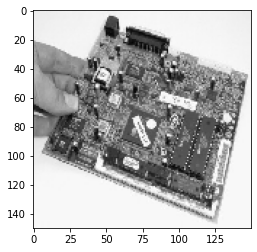

In [60]:
%matplotlib inline
img_path = 'boardnoboardimages/validation/noboard/nb18.jpg'

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

plt.imshow(img)
# Convert it to a Numpy array with shape (150, 150, 3)
test_x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
test_x = test_x.reshape((1,) + test_x.shape)
test_x = test_x.astype('float32') / 255
rust_prob = model.predict(test_x)
print(rust_prob)

if (rust_prob > 0.5):
    print("This is a board image")
else:
    print("This is a no board image")